# SVM Classifier

## Explore Random Forest Results with various Undersampling and Oversampling methods.

Undersampling methods to explore:
- Random Undersampling
- Cluster Centroids Undersampling
- Near Miss Undersampling 

Oversampling methods to explore:
- Random Oversampling
- SMOTE
- ADASYN

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from src import model_results
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.drop('Time',axis=1,inplace=True)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Train Test Split 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Class',axis=1)
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

## Scale data (Amount column) for SVM 

- Applying train-test-split before scaling X_train and X_test 'Amount' column 
- Scale X_train and X_test separately 
- This is to avoid data leakage (as oppose to scaling before splitting)

In [8]:
from sklearn.preprocessing import scale

In [9]:
#Scale the Amount colmun for SVC (on training data)
X_train_scaled_amount = scale(X_train['Amount'])

In [10]:
#Replace the original 'Amount' column with scaled 'Amount'
X_train['Amount']=X_train_scaled_amount

C:\Users\Long Bing\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#X_train 'Amount' is scaled
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
64454,-3.538816,3.481893,-1.827130,-0.573050,2.644106,-0.340988,2.102135,-2.939006,2.578654,3.155261,...,1.345904,0.530978,-0.860677,-0.201810,-1.719747,0.729143,-0.547993,-0.023636,-0.454966,-0.364820
37906,-0.363913,0.853399,1.648195,1.118934,0.100882,0.423852,0.472790,-0.972440,0.033833,0.629036,...,-0.192932,0.687055,-0.094586,0.121531,0.146830,-0.944092,-0.558564,-0.186814,-0.257103,-0.291617
79378,1.193021,-0.136714,0.622612,0.780864,-0.823511,-0.706444,-0.206073,-0.016918,0.781531,-0.185059,...,-0.178761,-0.310405,-0.842028,0.085477,0.366005,0.254443,0.290002,-0.036764,0.015039,-0.269644
245686,1.604032,-0.808208,-1.594982,0.200475,0.502985,0.832370,-0.034071,0.234040,0.550616,-0.051983,...,-0.040448,0.519029,1.429217,-0.139322,-1.293663,0.037785,0.061206,0.005387,-0.057296,0.286095
60943,-2.669614,-2.734385,0.662450,-0.059077,3.346850,-2.549682,-1.430571,-0.118450,0.469383,-0.185599,...,-0.430295,-0.228329,-0.370643,-0.211544,-0.300837,-1.174590,0.573818,0.388023,0.161782,-0.128344


In [12]:
#Scale the Amount colmun for SVC (on testng data)
X_test_scaled_amount = scale(X_test['Amount'])

In [13]:
#Replace the original 'Amount' column with scaled 'Amount'
X_test['Amount']=X_test_scaled_amount

C:\Users\Long Bing\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#X_test 'Amount' is scaled
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
254469,-1.189404,-0.591269,-0.600846,3.512289,-1.390089,1.752359,2.374289,0.450939,-1.003577,-0.084505,...,0.969503,0.745457,1.095133,1.461693,0.589701,-0.209193,0.097121,-0.223566,0.092385,2.073851
121929,1.253168,-0.536514,0.010453,-2.002376,-0.675496,-0.765532,-0.155118,-0.136187,1.882972,-1.532621,...,0.002578,0.016080,0.425180,-0.274055,0.104499,0.954705,-0.672143,0.074562,0.009715,-0.232562
114879,-1.644384,0.233326,1.593087,-0.030053,1.026072,-1.067972,0.373123,-1.477697,0.415043,1.324159,...,-0.240111,0.391676,-0.420744,-0.276312,0.542789,-0.633719,-0.028573,-0.127075,-0.290045,-0.265498
81232,-0.636997,0.645736,0.269894,-0.538135,1.507577,4.108075,-0.988026,1.529162,0.059633,-0.522691,...,0.014794,0.039418,-0.003335,-0.023020,1.042331,-0.522377,0.315403,-0.079888,0.098038,-0.307288
273250,-8.082612,7.069211,-4.137467,-3.087794,-0.356587,-1.988519,1.663142,-0.366969,6.218938,10.880683,...,4.263887,-0.901314,0.532696,0.128477,0.005124,1.255585,-0.000528,2.071641,0.565471,-0.309437


# Instantiate SVC

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC() #using only default parameters and gridsearch takes a very long time on oversampled data

# Undersample training data (Random Undersampling, Cluster Centroids, Near Miss

## Random Undersampling 

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
random_undersampler = RandomUnderSampler(random_state=111)

In [27]:
X_random_under, y_random_under = random_undersampler.fit_sample(X_train,y_train)

In [28]:
#The number of Non-Fraudent data in the test set is being undersampled (with random undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_random_under==0)
Fraud_count_random = sum(y_random_under==1)
print('Number of Non-Fradulent in test data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in test data = '+ str(Fraud_count_random))

Number of Non-Fradulent in test data = 339
Number of Fradulent in test data = 339


Accuracy: 0.9773182121414277


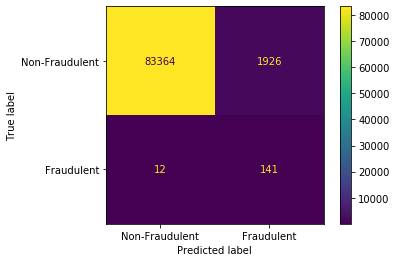

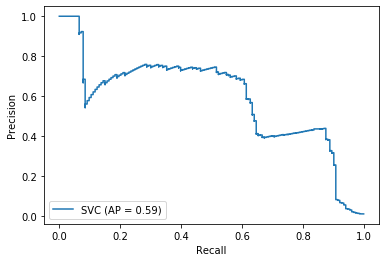

In [29]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(svc,X_random_under,y_random_under,X_test,y_test)

## Cluster Centroids Undersampling 

In [30]:
from imblearn.under_sampling import ClusterCentroids

In [31]:
cc_undersampler = ClusterCentroids(sampling_strategy = 'majority',random_state=111) #undersample the majority class

In [32]:
X_cc_under, y_cc_under = cc_undersampler.fit_sample(X_train,y_train)

In [33]:
#The number of Non-Fraudent data in the test set is being undersampled (with cluster centroid undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_cc_under==0)
Fraud_count_random = sum(y_cc_under==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 339
Number of Fradulent in training data = 339


Accuracy: 0.9938906639514062


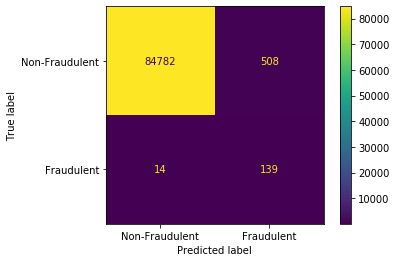

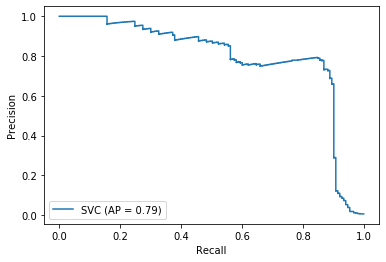

In [34]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(svc,X_cc_under,y_cc_under,X_test,y_test)

## Near Miss Undersampling 

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
nm_undersampler_v3 = NearMiss(version=3)

In [37]:
X_nm_under, y_nm_under = nm_undersampler_v3.fit_sample(X_train,y_train)

C:\Users\Long Bing\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


In [38]:
#The number of Non-Fraudent data in the test set is being undersampled (with near miss undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_nm_under==0)
Fraud_count_random = sum(y_nm_under==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 309
Number of Fradulent in training data = 339


Accuracy: 0.9987008883115059


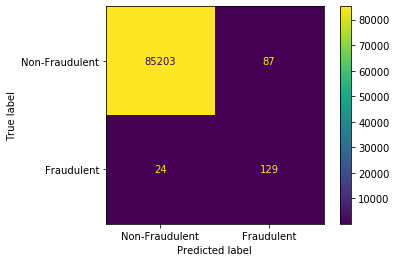

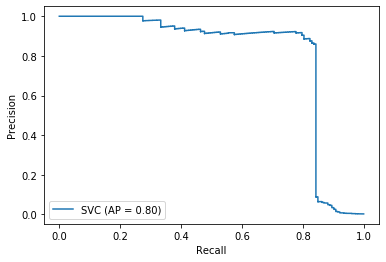

In [39]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(svc,X_nm_under,y_nm_under,X_test,y_test)

# Oversample training data (Random Oversampling, SMOTE, ADASYN)

## Random Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
random_oversampler = RandomOverSampler(random_state=111)

In [20]:
X_random_over, y_random_over = random_oversampler.fit_sample(X_train,y_train)

In [21]:
Non_Fraud_count_random = sum(y_random_over==0)
Fraud_count_random = sum(y_random_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 199025


Accuracy: 0.9982210362463865


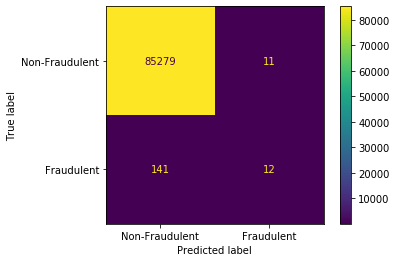

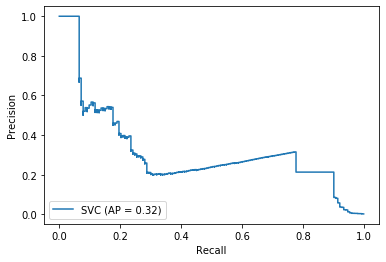

In [22]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(svc,X_random_over,y_random_over,X_test,y_test)

## SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote_oversampler = SMOTE(k_neighbors=20,random_state=111)

In [42]:
X_smote_over, y_smote_over = smote_oversampler.fit_sample(X_train,y_train)

In [43]:
Non_Fraud_count_random = sum(y_smote_over==0)
Fraud_count_random = sum(y_smote_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 199025


Accuracy: 0.9847968821319476


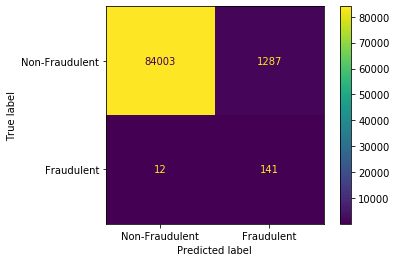

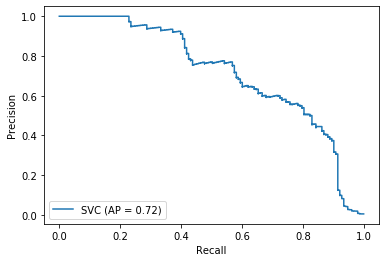

In [44]:
model_results(svc,X_smote_over,y_smote_over,X_test,y_test)

## ADASYN 

In [45]:
from imblearn.over_sampling import ADASYN

In [46]:
adasyn_oversampler = ADASYN(n_neighbors=20,random_state=111)

In [47]:
X_adasyn_over, y_adasyn_over = adasyn_oversampler.fit_sample(X_train,y_train)

In [48]:
Non_Fraud_count_random = sum(y_adasyn_over==0)
Fraud_count_random = sum(y_adasyn_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 198991


Accuracy: 0.9775405826106293


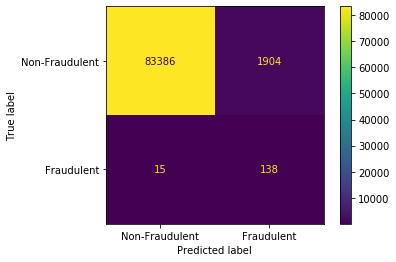

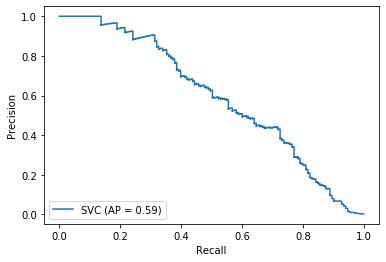

In [49]:
model_results(svc,X_adasyn_over,y_adasyn_over,X_test,y_test)